In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics


import seaborn as sn
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [3]:
d = {'Precision':[],'Recall':[],'F-score':[],'Accuracy':[] }
def results(model, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train.values.ravel())
    
    X_test_values = X_test.values
    y_predicted = model.predict(X_test_values)
    print(classification_report(y_test, y_predicted))

    array = confusion_matrix(y_test, y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')
    
   
    recall = metrics.recall_score(y_test, y_predicted, average='macro' )
    precision = metrics.precision_score(y_test, y_predicted, average='macro' )
    f_score = metrics.f1_score(y_test, y_predicted, average="macro") 
    acc = metrics.accuracy_score(y_test, y_predicted)
    
    print(round(recall,4) * 100, 'Recall')
    print(round(precision, 4)*100, 'pre')
    print(round(f_score, 4)*100, "fscore")
    print(round(acc, 4) *100, 'acc')
    
    
    
    d['Precision'].append(round(precision, 4)*100)
    d['Recall'].append(round(recall,4) * 100)
    d['F-score'].append(round(f_score, 4)*100)
    d['Accuracy'].append(round(acc, 4) *100)
                


In [4]:
#The data with extracted features
X_train_fex_old = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
X_test_fex_old = pd.read_csv("UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None)

y_train_old = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
y_test_old = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

In [5]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")


X_train_fex = scaler.fit_transform(X_train_fex)
X_test_fex  = scaler.fit_transform(X_test_fex)

X_train_fex = pd.DataFrame(X_train_fex)
X_test_fex = pd.DataFrame(X_test_fex)

print(X_train_fex.shape, X_test_fex.shape)



y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]
y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

print(y_train.shape, y_test.shape)

(7351, 561) (2946, 561)
(7351, 1) (2946, 1)


In [6]:
X_train_fex_new = pd.concat([X_train_fex_old, X_train_fex])
X_test_fex_new = pd.concat([X_test_fex_old, X_test_fex])

print(X_train_fex_new.shape, X_test_fex_new.shape)


y_train_new = pd.concat([y_train_old, y_train])
y_test_new = pd.concat([y_test_old, y_test])

print(y_train_new.shape,y_test_new.shape )

(14703, 561) (5893, 561)
(14703, 1) (5893, 1)


              precision    recall  f1-score   support

           1       0.90      0.87      0.89       496
           2       0.99      0.81      0.89       470
           3       0.79      0.99      0.88       420
           4       0.67      0.99      0.80       491
           5       0.99      0.55      0.71       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.89      0.87      0.86      2946
weighted avg       0.90      0.86      0.86      2946

86.96000000000001 Recall
89.18 pre
86.2 fscore
86.49 acc


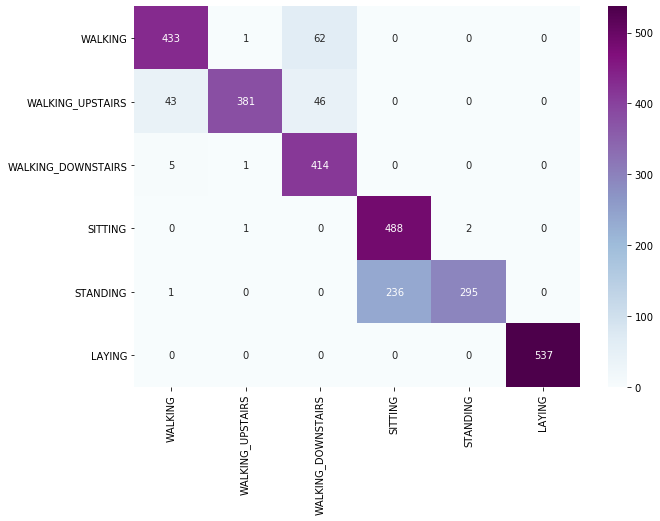

In [7]:
svm = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
results(svm, X_train_fex, y_train, X_test_fex, y_test)

In [6]:
X_train_fex.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,-0.041764,0.024651,0.010698,-0.693395,-0.673158,-0.634587,-0.744563,-0.718746,-0.738726,-0.750173,...,0.588460,0.528897,0.462929,0.003689,-0.007708,-0.490565,0.127552,-0.487831,0.444620,-0.063355
std,0.137896,0.112260,0.130442,0.336992,0.380106,0.408590,0.294540,0.332310,0.310031,0.280563,...,0.316412,0.281200,0.313303,0.460094,0.477701,0.861121,0.461045,0.511717,0.406266,0.281879
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.058049,0.014604,-0.003415,-0.988255,-0.986078,-0.988623,-0.991653,-0.989882,-0.992896,-0.989537,...,0.401653,0.396947,0.301442,-0.337894,-0.371466,-1.000000,-0.149677,-0.811596,0.338585,-0.151012
50%,-0.041374,0.027357,0.010888,-0.907514,-0.923556,-0.917709,-0.946229,-0.950742,-0.958117,-0.915971,...,0.651743,0.578332,0.519449,0.008741,-0.001520,-1.000000,0.131098,-0.707314,0.612371,-0.002939
75%,-0.027101,0.037801,0.023791,-0.415361,-0.420114,-0.278851,-0.515707,-0.487298,-0.488095,-0.540270,...,0.842485,0.732574,0.698221,0.354313,0.359161,0.414214,0.477220,-0.501801,0.702589,0.102574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X_train_fex.iloc[1,:].max()

0.9999988813719067

In [8]:
y_train.columns

Int64Index([0], dtype='int64')

In [9]:
y_train[0].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1072
3     986
Name: 0, dtype: int64

In [10]:
y_tr = y_train.copy()
y_tt = y_test.copy()

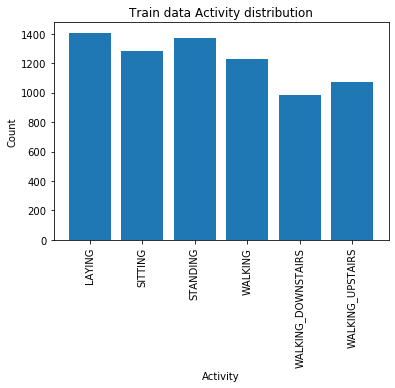

In [12]:
y_tr['Label'] = y_tr[0].apply(lambda x: LABELS[x-1] )

plt.bar(x = y_tr.groupby('Label').count().index, height = y_tr.groupby('Label').count()[0].values)

plt.title('Train data Activity distribution')
plt.ylabel("Count")
plt.xlabel('Activity')
plt.xticks(rotation = 90)
plt.show()

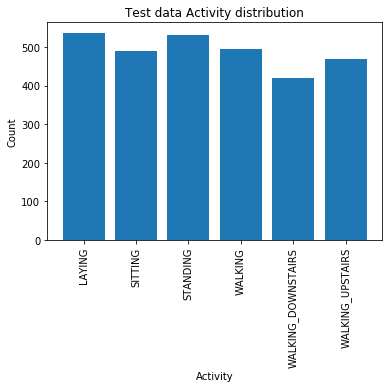

In [13]:
y_tt['Label'] = y_tt[0].apply(lambda x: LABELS[x-1] )

plt.bar(x = y_tt.groupby('Label').count().index, height = y_tt.groupby('Label').count()[0].values)

plt.title('Test data Activity distribution')
plt.ylabel("Count")
plt.xlabel('Activity')
plt.xticks(rotation = 90)
plt.show()

In [14]:
y_test[0].value_counts()

6    537
5    532
1    496
4    491
2    470
3    420
Name: 0, dtype: int64

In [15]:
X_train_fex

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.034867,0.029984,0.011540,-0.986228,-0.989347,-0.993678,-0.991574,-0.994851,-0.994852,-0.987284,...,0.187200,0.669455,0.627104,-0.649474,0.149614,1.000000,-0.334595,-0.844690,0.611444,-0.059641
1,-0.043683,0.027475,0.010393,-0.980545,-0.992967,-0.989469,-0.991608,-0.995063,-0.992626,-0.981462,...,-0.446341,0.587493,0.538350,0.854003,0.811173,-1.000000,0.159273,-0.847550,0.610115,-0.057621
2,-0.044210,0.024735,0.011911,-0.981882,-0.993238,-0.985878,-0.986605,-0.996517,-0.987119,-0.982522,...,0.836744,0.705557,0.666245,0.322774,0.523541,-1.000000,0.161483,-0.848351,0.612078,-0.054715
3,-0.033082,0.026948,0.017390,-0.987623,-0.994360,-0.985298,-0.992201,-0.996782,-0.993885,-0.981066,...,-0.923568,0.664082,0.621716,-0.725785,0.120955,-1.000000,-0.025439,-0.846925,0.617202,-0.050947
4,-0.039095,0.028647,0.011870,-0.986110,-0.992326,-0.986664,-0.991539,-0.995206,-0.991583,-0.979392,...,-0.763316,0.804387,0.780616,-0.582948,0.056492,-1.000000,0.446214,-0.848571,0.616962,-0.049085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,-0.259926,0.178848,-0.028531,-0.303277,0.052854,-0.232865,-0.378857,-0.112823,-0.316276,-0.479619,...,0.885565,0.431418,0.348264,0.644000,0.738936,0.414214,-0.188671,-0.800994,0.677442,0.052844
7347,0.262918,-0.063479,-0.223621,-0.310774,0.087419,-0.111020,-0.549724,-0.144338,-0.494297,-0.246950,...,0.722896,0.279734,0.180007,-0.712040,0.707773,1.000000,0.857900,-0.766402,0.708133,0.061081
7348,-0.023705,-0.201847,-0.282011,-0.427277,0.087998,-0.099537,-0.397856,0.076499,-0.510736,-0.577428,...,0.568826,0.358708,0.263393,-0.167262,-0.203954,-1.000000,0.930017,-0.772834,0.704712,0.053547
7349,-0.060045,-0.075793,-0.122774,-0.418850,0.159064,-0.226480,-0.439601,-0.024697,-0.571475,-0.645987,...,0.863081,0.308219,0.187789,-0.048374,-0.479103,1.000000,-0.387360,-0.780506,0.704531,0.019459


561


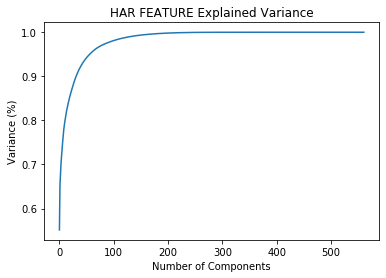

In [16]:
pca = PCA().fit(X_train_fex)
n_pcs= pca.components_.shape[0]
print(n_pcs)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important = most_important[:300]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('HAR FEATURE Explained Variance')
plt.show()
#components_

              precision    recall  f1-score   support

           1       0.92      0.84      0.88       496
           2       0.98      0.84      0.90       470
           3       0.76      0.97      0.85       420
           4       0.71      0.96      0.82       491
           5       0.95      0.64      0.76       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2946
   macro avg       0.89      0.87      0.87      2946
weighted avg       0.89      0.87      0.87      2946

87.44 Recall
88.73 pre
86.94 fscore
87.1 acc


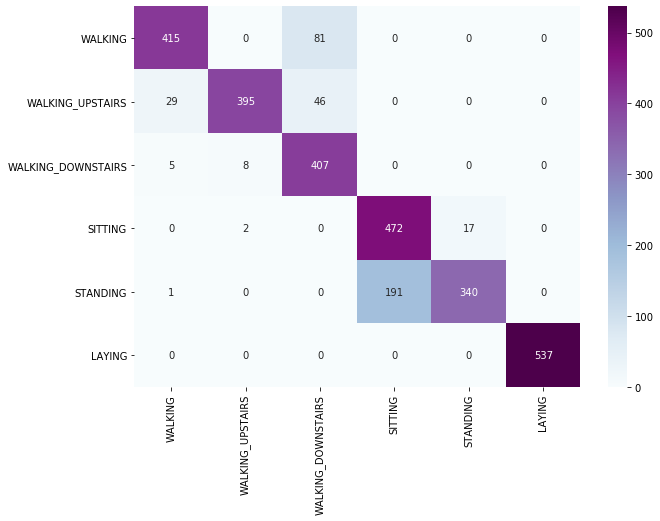

In [17]:
clf = SVC(gamma='auto')
results(clf, X_test_fex, y_test)

In [12]:
d

{'Precision': [94.19],
 'Recall': [93.87],
 'F-score': [93.97],
 'Accuracy': [94.03]}

              precision    recall  f1-score   support

           1       0.81      0.81      0.81       496
           2       0.94      0.77      0.85       470
           3       0.74      0.90      0.81       420
           4       0.79      0.91      0.84       491
           5       0.91      0.77      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.86      0.86      0.86      2946
weighted avg       0.87      0.86      0.86      2946

86.00999999999999 Recall
86.47 pre
85.79 fscore
86.05000000000001 acc


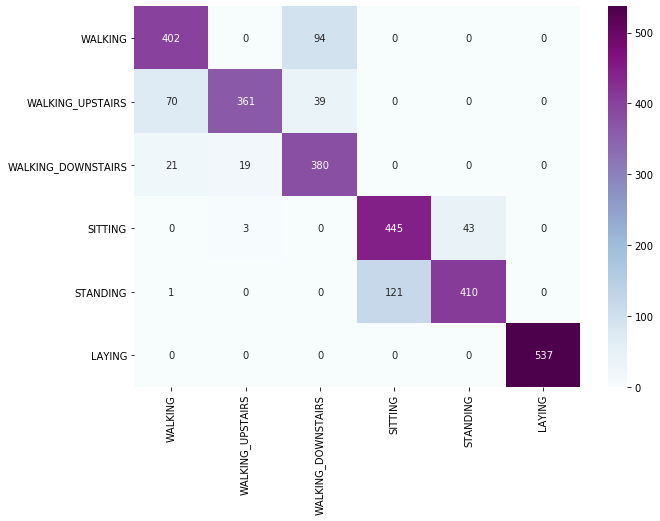

In [20]:
clf = KNeighborsClassifier()
results(clf, X_test_fex, y_test)

              precision    recall  f1-score   support

           1       0.89      0.74      0.81       496
           2       0.97      0.75      0.85       470
           3       0.66      0.97      0.79       420
           4       0.78      0.95      0.86       491
           5       0.94      0.76      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.88      0.86      0.86      2946
weighted avg       0.88      0.86      0.86      2946

86.07000000000001 Recall
87.55 pre
85.69 fscore
85.95 acc


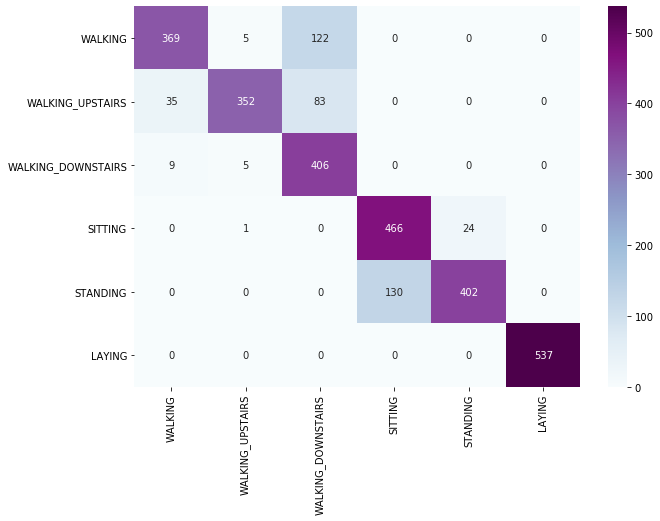

In [21]:
clf = RandomForestClassifier()
results(clf, X_test_fex, y_test)

In [22]:
l = ['Support Vector Machine',
    'K-Nearest Neighbors',
    'Random Forest'
    ]
d
q = pd.DataFrame(d, index = l)
q

ValueError: Shape of passed values is (4, 4), indices imply (3, 4)

# GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

In [25]:
def svc_param_selection(X, y, nfolds):

    param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
                  'gamma' : [0.01, 0.1, 1, 10, 100], 
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }

#     param_grid = {'C': [100, 1000,10000, 100000], 
#                 'gamma' : [0.0001, 0.001, 0.01], 
#                 'kernel': ['rbf'] }

    grid_search = GridSearchCV( SVC(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1) # use all processor
    grid_search.fit(X, y)

    return grid_search.best_params_

svc_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
d = {"Precision":[], 'Recall':[],'F-score': [], 'Accuracy': []} 

              precision    recall  f1-score   support

           1       0.90      0.87      0.89       496
           2       0.99      0.81      0.89       470
           3       0.79      0.99      0.88       420
           4       0.67      0.99      0.80       491
           5       0.99      0.55      0.71       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.89      0.87      0.86      2946
weighted avg       0.90      0.86      0.86      2946

86.96000000000001 Recall
89.18 pre
86.2 fscore
86.49 acc


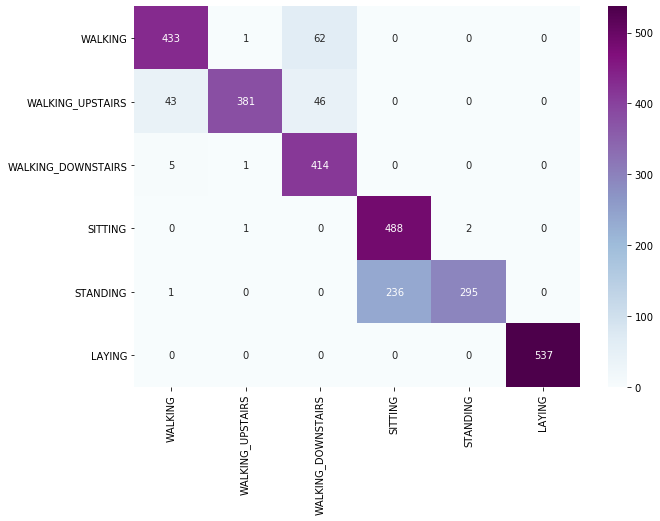

In [28]:
clf = SVC(C = 10, gamma = 0.01, kernel= 'rbf')
results(clf, X_test_fex, y_test)

In [40]:
def knn_param_selection(X, y, nfolds):
    # param_grid = {'n_neighbors' : [3,5,7,11], 
    param_grid = {'n_neighbors' : [11,13,15,19,21]}
                # 'weights':['uniform', 'distance'], 
                # 'metric':['euclidean','manhattan'] }

    grid_search = GridSearchCV(KNeighborsClassifier(), 
                             param_grid, 
                             cv = nfolds,
                             n_jobs = -1)

    grid_search.fit(X,y)

    return grid_search.best_params_
                  
# knn_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 15}

In [18]:
clf = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')
results(clf, X_test_fex, y_test)

              precision    recall  f1-score   support

           1       0.86      0.98      0.92       496
           2       0.88      0.91      0.89       471
           3       0.98      0.78      0.87       420
           4       0.97      0.82      0.89       491
           5       0.86      0.98      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947

91.23 Recall
92.45 pre
91.43 fscore
91.79 acc


In [7]:
def rf_param_selection(X, y, nfolds):
    param_grid = {'n_estimators': [40, 50, 150],
                'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
                'min_samples_split': [4, 6,8, 10]}

    grid_search = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv = nfolds,
                             n_jobs = -1)
    grid_search.fit(X,y)

    return grid_search.best_params_

rf_param_selection(X_train_fex.values, y_train, 5)

/Users/serik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 150}

              precision    recall  f1-score   support

           1       0.91      0.76      0.83       496
           2       0.97      0.69      0.81       470
           3       0.64      0.97      0.77       420
           4       0.79      0.95      0.86       491
           5       0.94      0.77      0.85       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2946
   macro avg       0.87      0.86      0.85      2946
weighted avg       0.88      0.86      0.86      2946

85.57000000000001 Recall
87.42 pre
85.19 fscore
85.50999999999999 acc


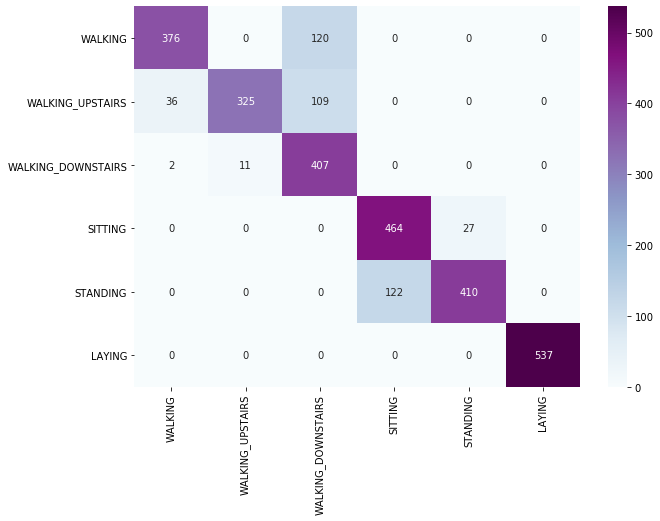

In [29]:
clf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
results(clf, X_test_fex, y_test)

In [20]:
l = ['Support Vector Machine',
    'K-Nearest Neighbors',
    'Random Forest'
    ]
d
q = pd.DataFrame(d, index = l)
q

,Precision,Recall,F-score,Accuracy
Support Vector Machine,96.63,96.33,96.42,96.47
K-Nearest Neighbors,92.45,91.23,91.43,91.79
Random Forest,92.62,92.24,92.35,92.53


# TEST

In [48]:
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:,.5f}'.format

In [46]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())


SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)
rf.fit(X_train_fex.values, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
X_train_fex = pd.read_csv("TRAIN_NEW_ALL.csv")
X_train_fex

y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)[:-1]

X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")
X_test_fex

Y = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]


scaler = MinMaxScaler(feature_range = [-1,1])
X_train_fex  = scaler.fit_transform(X_train_fex)
X_train_fex = pd.DataFrame(X_train_fex)

In [15]:
X_test_fex = pd.read_csv("TEST_NEW_ALL.csv")
X_test_fex

Y = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)[:-1]

In [16]:
scaler = MinMaxScaler(feature_range = [-1,1])

X_test_fex  = scaler.fit_transform(X_test_fex)

X_test_fex = pd.DataFrame(X_test_fex)

In [27]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predicted = clf.predict(X_test_fex)
print(set(y_predicted))

{1, 2, 3, 4, 5, 6}


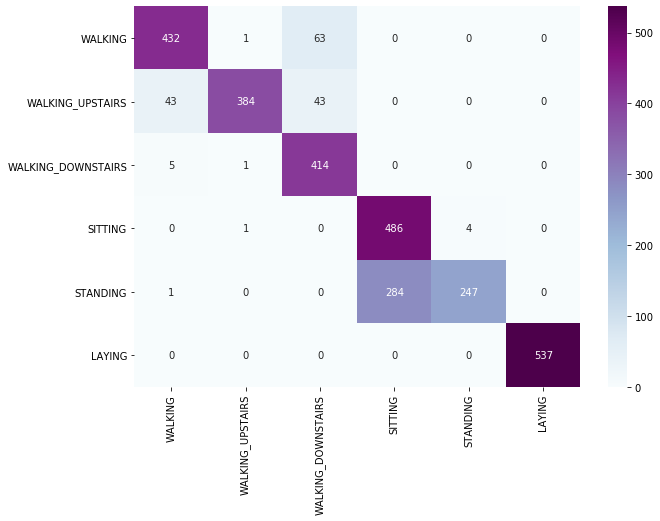

In [19]:
array = confusion_matrix(np.squeeze(Y.values),y_predicted)
df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')

In [20]:
metrics.accuracy_score(np.squeeze(Y.values),y_predicted)

0.8486082824168364

In [37]:
# #The data with extracted features
# X_train_fex = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
# X_test_fex = pd.read_csv("UCI HAR Dataset/test/X_test.txt",delim_whitespace=True, header=None)

# y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
# y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)

In [29]:
def check(model, X, Y):
    path = 'Real-Time'
    model.fit(X_train_fex.values, y_train.values.ravel())
    
    test_x = pd.read_csv('{0}/{1}'.format(path, X))
    test_y = pd.read_csv('{0}/{1}'.format(path, Y))

    scaler = MinMaxScaler(feature_range = [-1,1])
    test_x  = scaler.fit_transform(test_x)
    
    y_predicted = model.predict(test_x)

    print(set(y_predicted))

    print('Accuracy is: ', metrics.accuracy_score(test_y,y_predicted))
    
    array = confusion_matrix(test_y,y_predicted)
    df_cm = pd.DataFrame(array, index = [i for i in LABELS],
                    columns = [i for i in LABELS])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="BuPu",fmt='g')



# SVM

{1, 2, 3, 4, 5, 6}
Accuracy is:  0.7671232876712328


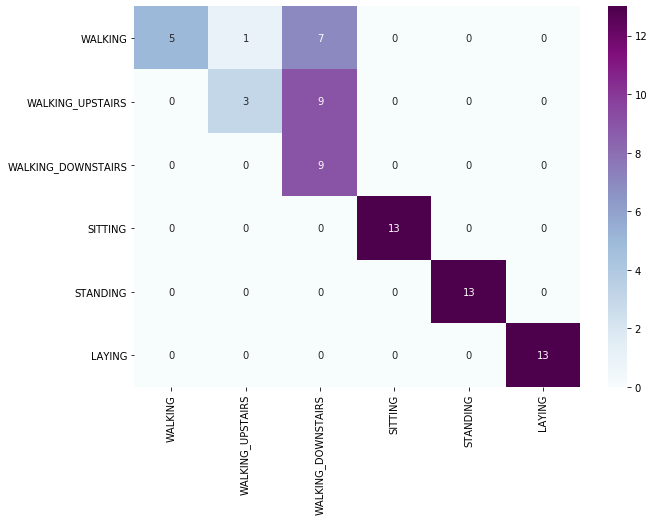

In [40]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())

check(svm, 'X.csv', 'Y.csv')

{1, 2, 3, 4, 5, 6}
Accuracy is:  0.6883116883116883


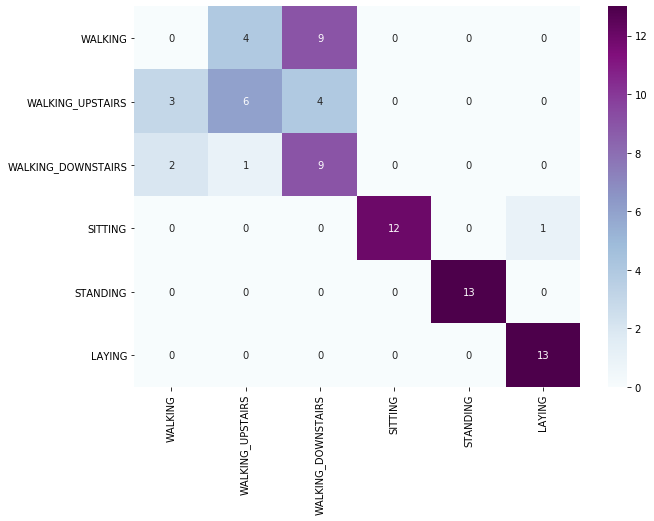

In [62]:
clf = SVC(C = 10000, gamma = 0.01, kernel= 'rbf')
clf.fit(X_train_fex.values, y_train.values.ravel())

check(svm, 'X.csv', 'Y.csv')

{1, 2, 3, 4, 5, 6}
Accuracy is:  0.6883116883116883


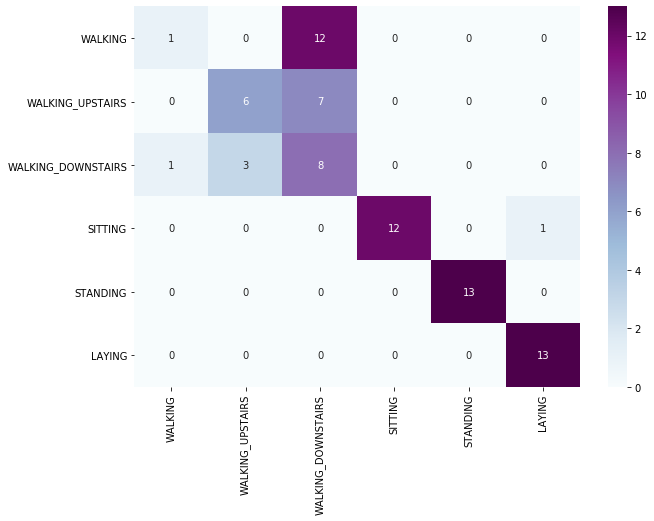

In [50]:
check(svm, 'X.csv', 'Y.csv')

# KNN

{1, 2, 3, 4, 5, 6}
Accuracy is:  0.7142857142857143


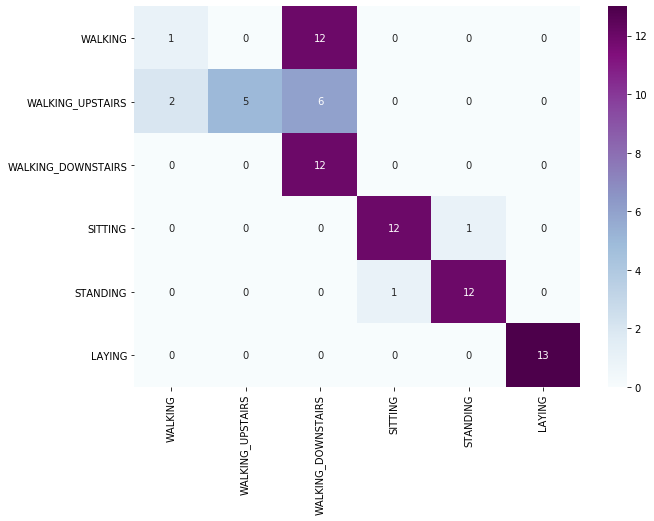

In [58]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 15, weights = 'distance')

knn.fit(X_train_fex.values, y_train.values.ravel())

check(knn, 'X.csv', 'Y.csv')

# Random Forest

{2, 3, 4, 5, 6}
Accuracy is:  0.6623376623376623


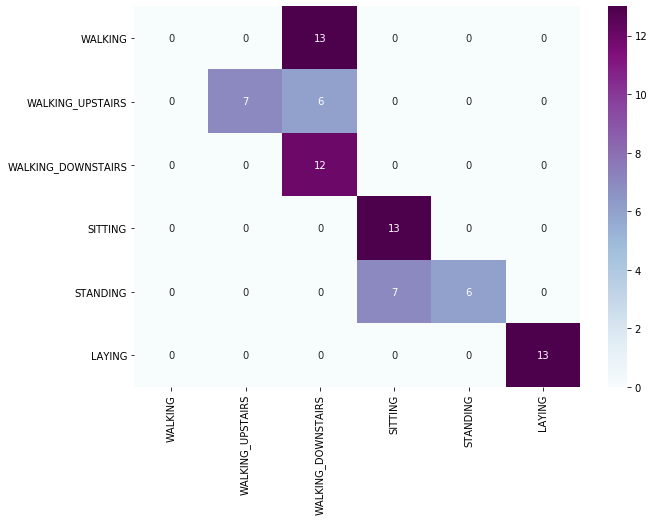

In [59]:
rf = RandomForestClassifier(max_features= 'sqrt', min_samples_split= 6, n_estimators = 50)

rf.fit(X_train_fex.values, y_train.values.ravel())

check(rf, 'X.csv', 'Y.csv')